In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True
import scipy
from scipy import interpolate
import scipy.integrate as si
import pandas as pd
from scipy.special import gamma as Gamma

from pylab import imshow,cm
from matplotlib.colors import LogNorm

In [2]:
corr_3D_proper_fkp_nfit_1p51_3p3 = np.loadtxt('./corr_3D_ps_nbin60_proper_fkp_nfit_1p51_3p3.txt',unpack=True)
pi_proper_fkp_nfit_1p51_3p3      = corr_3D_proper_fkp_nfit_1p51_3p3[0,:60]
sigma_proper_fkp_nfit_1p51_3p3  = corr_3D_proper_fkp_nfit_1p51_3p3[1,::60]
corr_3D_proper_fkp_nfit_1p51_3p3_reshape = np.reshape(corr_3D_proper_fkp_nfit_1p51_3p3[2],(20,60))
print corr_3D_proper_fkp_nfit_1p51_3p3_reshape.shape

(20, 60)


In [3]:
print corr_3D_proper_fkp_nfit_1p51_3p3_reshape[0,0], corr_3D_proper_fkp_nfit_1p51_3p3_reshape[0,1]

35.21703 15.36536


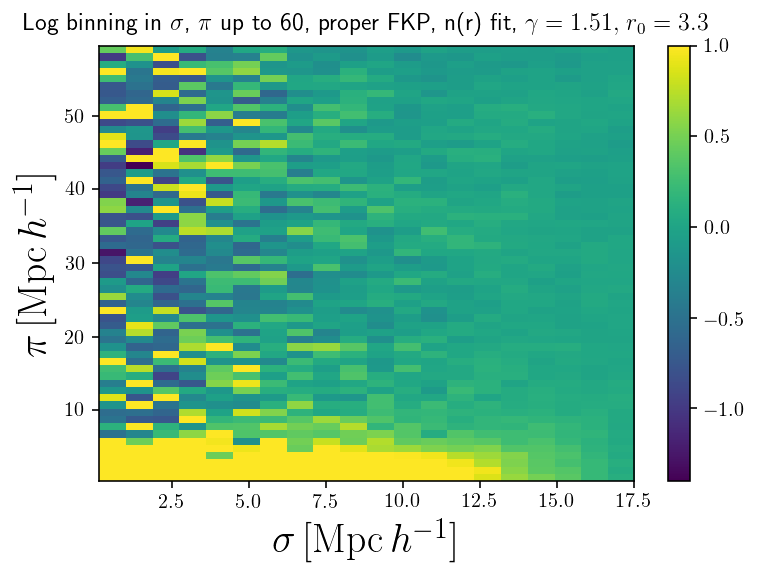

In [4]:
plt.imshow((corr_3D_proper_fkp_nfit_1p51_3p3_reshape).T,origin='lower',\
           aspect='auto',extent=[(sigma_proper_fkp_nfit_1p51_3p3.min()),(sigma_proper_fkp_nfit_1p51_3p3.max()),\
                                 pi_proper_fkp_nfit_1p51_3p3.min(),pi_proper_fkp_nfit_1p51_3p3.max()],vmax=1)
plt.colorbar()
plt.ylabel('$\\pi\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.xlabel('$\\sigma\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.title('Log binning in $\\sigma$, $\\pi$ up to 60, proper FKP, n(r) fit, $\\gamma=1.51,\,r_0=3.3$')

In [5]:
Sig_sig_proper_fkp_nfit_1p51_3p3 = 2.*np.sum(corr_3D_proper_fkp_nfit_1p51_3p3_reshape[:,np.where(pi_proper_fkp_nfit_1p51_3p3<30.)[0]],axis=1)

In [6]:
gamma = 1.51
r0    = 3.30

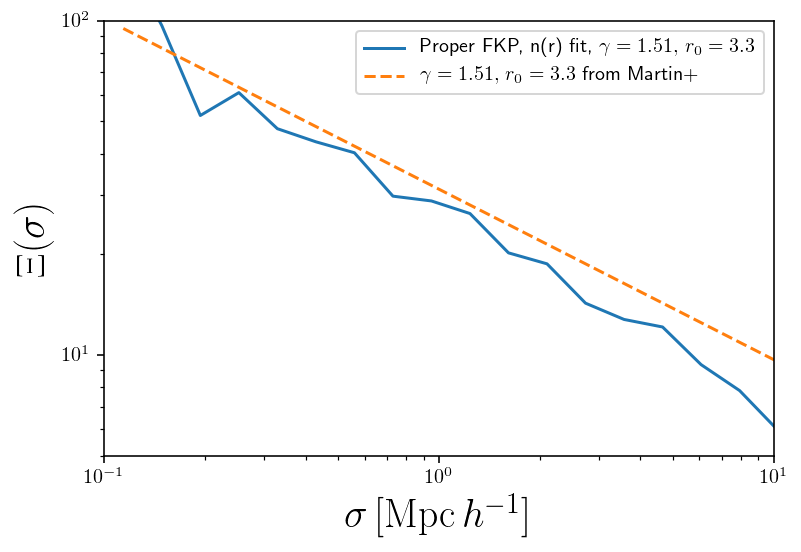

In [7]:
plt.plot(sigma_proper_fkp_nfit_1p51_3p3,Sig_sig_proper_fkp_nfit_1p51_3p3, label = 'Proper FKP, n(r) fit, $\\gamma=1.51,\,r_0=3.3$')
plt.plot(sigma_proper_fkp_nfit_1p51_3p3,Gamma(0.5)*Gamma((gamma-1.)/2.)/Gamma(gamma/2.)*r0**gamma/sigma_proper_fkp_nfit_1p51_3p3**(gamma-1.),'--',\
        label = '$\\gamma=1.51,\,r_0=3.3$ from Martin+')
plt.loglog() 
plt.xlim([0.1,10])
plt.ylim([5,100])
plt.xlabel('$\\sigma\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.ylabel('$\\Xi(\\sigma)$',fontsize=20)
plt.legend(loc=0)

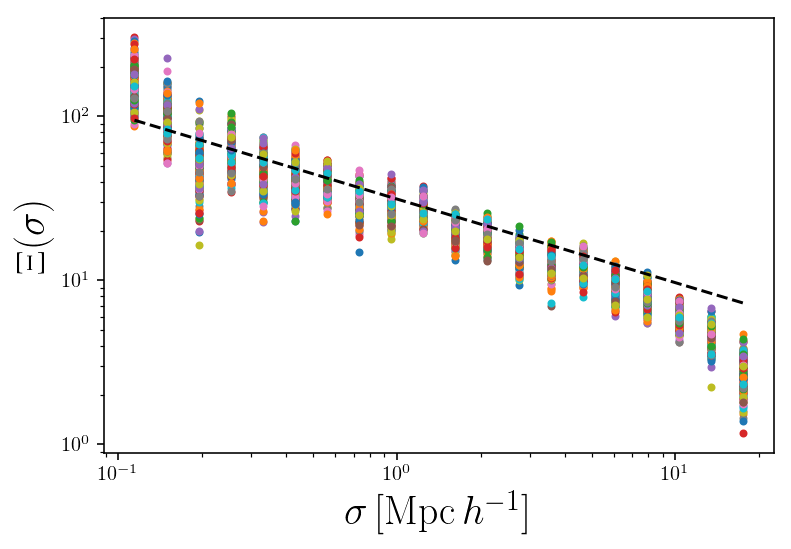

In [8]:
# bootstrap proper
n_samples = 200
Sig_sig_boot_proper = np.zeros((n_samples,sigma_proper_fkp_nfit_1p51_3p3.size))
for i in xrange(0,n_samples):
    corr_ = np.loadtxt('./bootstrap_proper/corr_3D_ps_proper_fkp_nfit_%s.txt'%(i+1), unpack=True)
    corr_reshape_ = np.reshape(corr_[2],(20,60))
    Sig_sig_boot_proper[i,:] = 2.*np.sum(corr_reshape_[:,np.where(pi_proper_fkp_nfit_1p51_3p3<30.)[0]],axis=1)
    plt.loglog(sigma_proper_fkp_nfit_1p51_3p3,Sig_sig_boot_proper[i,:],'.')
plt.plot(sigma_proper_fkp_nfit_1p51_3p3,Gamma(0.5)*Gamma((gamma-1.)/2.)/Gamma(gamma/2.)\
         *r0**gamma/sigma_proper_fkp_nfit_1p51_3p3**(gamma-1.),'--',\
        label = '$\\gamma=1.51,\,r_0=3.3$ from Martin+',color='k')
plt.xlabel('$\\sigma\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.ylabel('$\\Xi(\\sigma)$',fontsize=20)

In [9]:
sig_sig_errors_proper = np.std(Sig_sig_boot_proper,axis=0)

In [10]:
print sig_sig_errors_proper

[ 41.30561213  26.44865778  17.82070051  14.5364743   10.40539467
   8.79661275   6.09354134   5.336168     4.87852102   3.44985802
   2.62600447   2.46199636   1.94352442   1.85861991   1.61413431
   1.3328801    1.04711765   0.78306532   0.72344873   0.62339831]


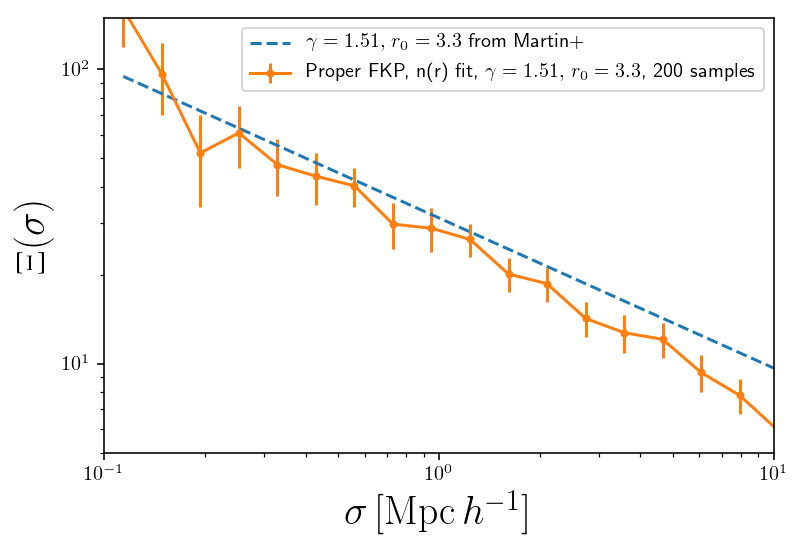

In [11]:
plt.plot(sigma_proper_fkp_nfit_1p51_3p3,Gamma(0.5)*Gamma((gamma-1.)/2.)/Gamma(gamma/2.)\
         *r0**gamma/sigma_proper_fkp_nfit_1p51_3p3**(gamma-1.),'--',\
        label = '$\\gamma=1.51,\,r_0=3.3$ from Martin+')
plt.errorbar(sigma_proper_fkp_nfit_1p51_3p3,Sig_sig_proper_fkp_nfit_1p51_3p3,yerr=sig_sig_errors_proper, \
             marker='.', label = 'Proper FKP, n(r) fit, $\\gamma=1.51,\,r_0=3.3$, %s samples'%n_samples)
plt.loglog() 
plt.xlim([0.1,10])
plt.ylim([5,150])
plt.xlabel('$\\sigma\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.ylabel('$\\Xi(\\sigma)$',fontsize=20)
plt.legend(loc=0)

# Now we move to $\xi(r)$ analysis

In [69]:
s = sigma_proper_fkp_nfit_1p51_3p3
S = Sig_sig_proper_fkp_nfit_1p51_3p3

In [55]:
xi = np.zeros(s.size-1)
for i in xrange(0,s.size-1):
    sum_i = 0.0
    for j in xrange(i,s.size-1):
        sum_i += (S[j+1]-S[j])/(s[j+1]-s[j])*\
            np.log((s[j+1]+np.sqrt(s[j+1]**2-s[i]**2))/(s[j]+np.sqrt(s[j]**2-s[i]**2))) 
#         print i,-1./np.pi*sum_i 
    xi[i] = -1./np.pi*sum_i

In [58]:
xi_boot = np.zeros((n_samples,s.size-1))
for k in xrange(0,n_samples):
    for i in xrange(0,s.size-1):
        sum_i = 0.0
        for j in xrange(i,s.size-1):
            Sboot = Sig_sig_boot_proper[k,:]
            sum_i += (Sboot[j+1]-Sboot[j])/(s[j+1]-s[j])*\
                np.log((s[j+1]+np.sqrt(s[j+1]**2-s[i]**2))/(s[j]+np.sqrt(s[j]**2-s[i]**2))) 
        xi_boot[k,i] = -1./np.pi*sum_i

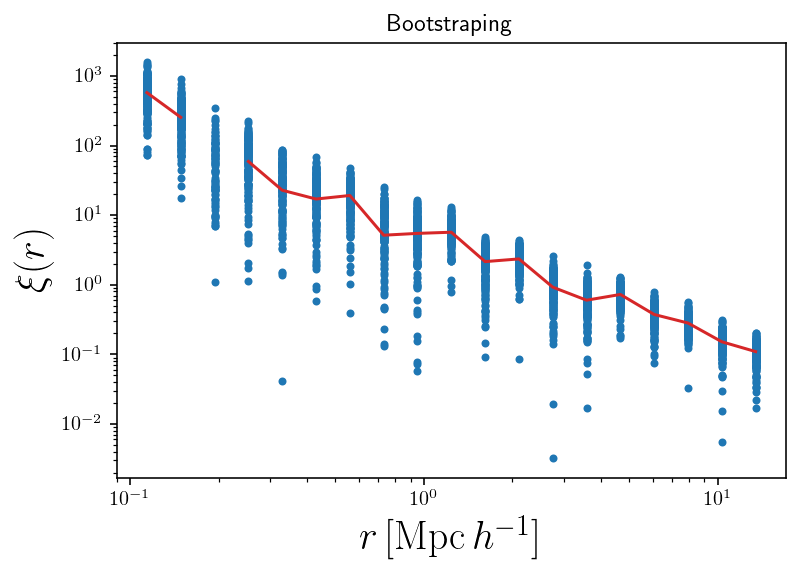

In [72]:
for i in xrange(0,n_samples):
    plt.plot(s[:-1],xi_boot[i,:],'C0.')
plt.plot(s[:-1],xi,'C3')
plt.loglog()
plt.xlabel('$r\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.ylabel('$\\xi(r)$',fontsize=20)
plt.title('Bootstraping')

In [61]:
print xi_boot.shape, xi.shape

(200, 19) (19,)


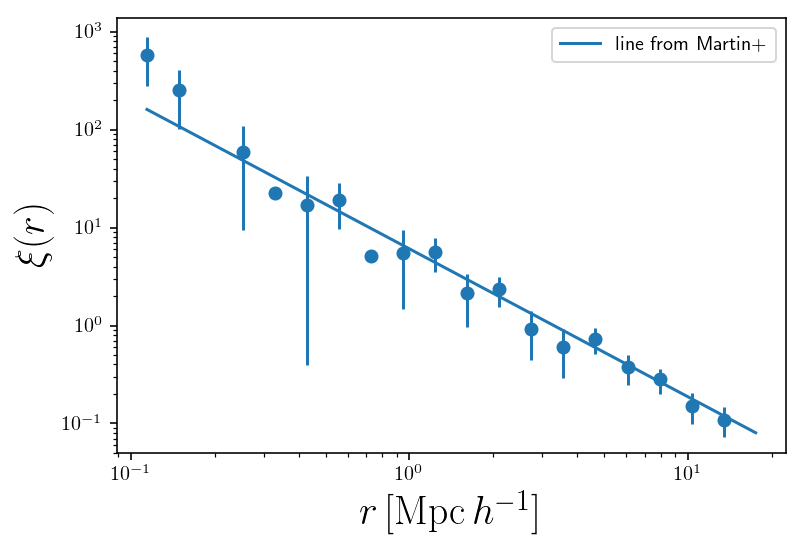

In [158]:
plt.errorbar(s[:-1],xi,yerr=np.std(xi_boot,axis=0),fmt='C0o')
plt.loglog(s,(s/3.3)**(-1.51), label = 'line from Martin+')
plt.xlabel('$r\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.ylabel('$\\xi(r)$',fontsize=20)
plt.legend()

In [108]:
Cov = np.zeros((s.size-1,s.size-1))
for i in xrange(0,s.size-1):
    for j in xrange(0,s.size-1):
        Cov[i][j] = np.sum((xi_boot[:,i]-np.mean(xi_boot[:,i]))*(xi_boot[:,j]-np.mean(xi_boot[:,j])))/(n_samples-1.)
np.savetxt('Cov_xi_r.txt',np.transpose(Cov))
iCov = np.linalg.inv(Cov)

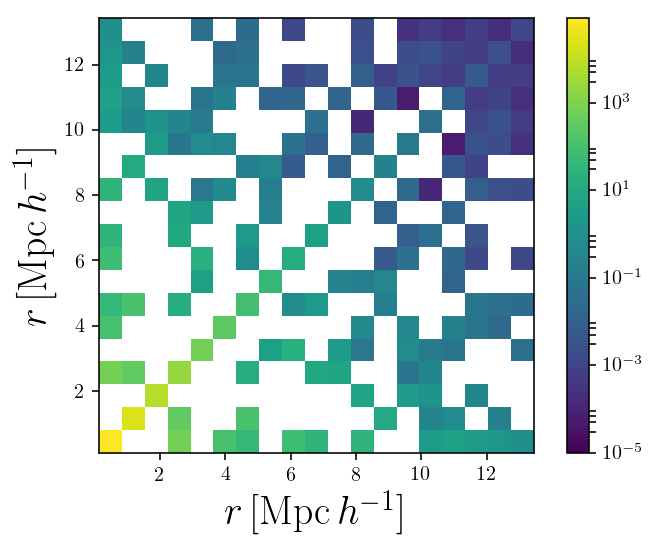

In [109]:
plt.imshow(Cov, origin='lower', extent=[(s[:-1].min()),(s[:-1].max()),s[:-1].min(),s[:-1].max()], \
           norm=LogNorm(vmin = 1e-5, vmax=Cov.max()))
plt.ylabel('$r\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.xlabel('$r\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.colorbar()

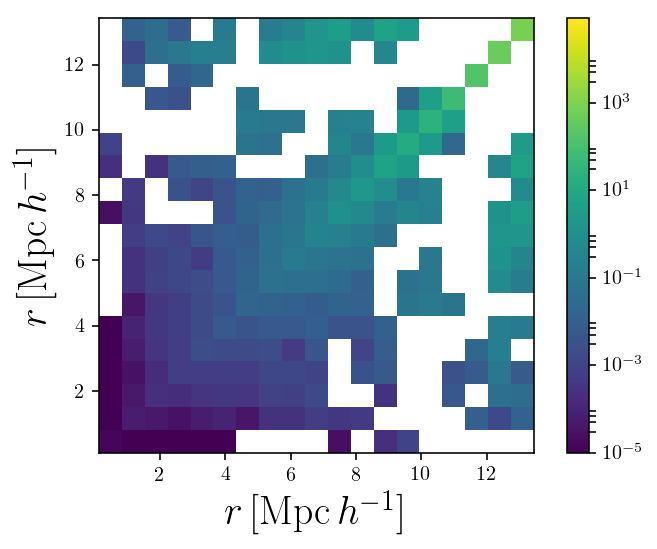

In [110]:
plt.imshow(iCov, origin='lower', extent=[(s[:-1].min()),(s[:-1].max()),s[:-1].min(),s[:-1].max()], \
           norm=LogNorm(vmin = 1e-5, vmax=Cov.max()))
plt.ylabel('$r\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.xlabel('$r\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.colorbar()

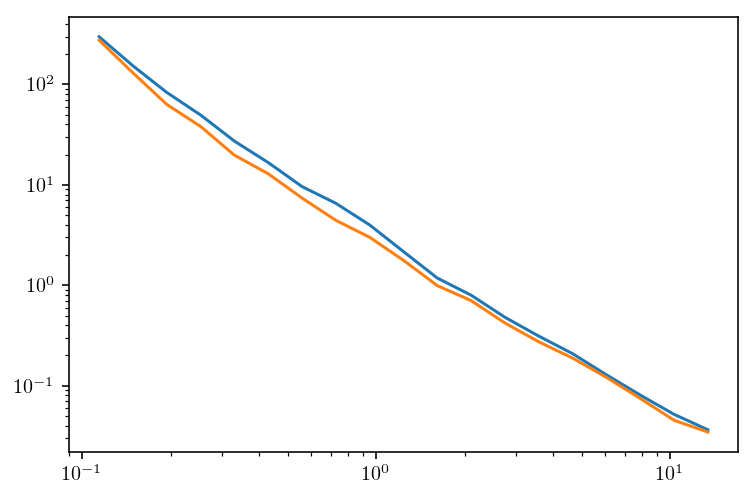

In [111]:
plt.loglog(s[:-1],np.sqrt(np.diag(Cov)))
plt.loglog(s[:-1],np.sqrt(1./np.diag(iCov)))

In [114]:
import emcee

def power_law(r,p):
    return (r/p[0])**(p[1])

def lnprob(theta, x, y, icov):
    model = power_law(x, theta)
    diff = y - model
    return -np.dot(diff,np.dot(icov,diff))/2.0

# Initial parameters:
p0=[5.0, -1.5]

ndim, nwalkers = 2, 100
pos = [p0 + 1E-2 * np.random.randn(ndim) for i in range (nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(s[:-1], xi, iCov))
sampler.run_mcmc(pos, 3000)

#what did sampler do? It drew a lot of nicely arranged points in the parameter space. Density of poins follows probability of k and n:
samples = sampler.chain[:, 500:, :].reshape((-1, ndim))

(3.0189820154171292, 0.19942197587569588, 0.19456250771069872) (-1.5371146038827135, 0.076765248830565902, 0.079019629758739995)
[3.0189820154171292, -1.5371146038827135]
7.63405729897 17


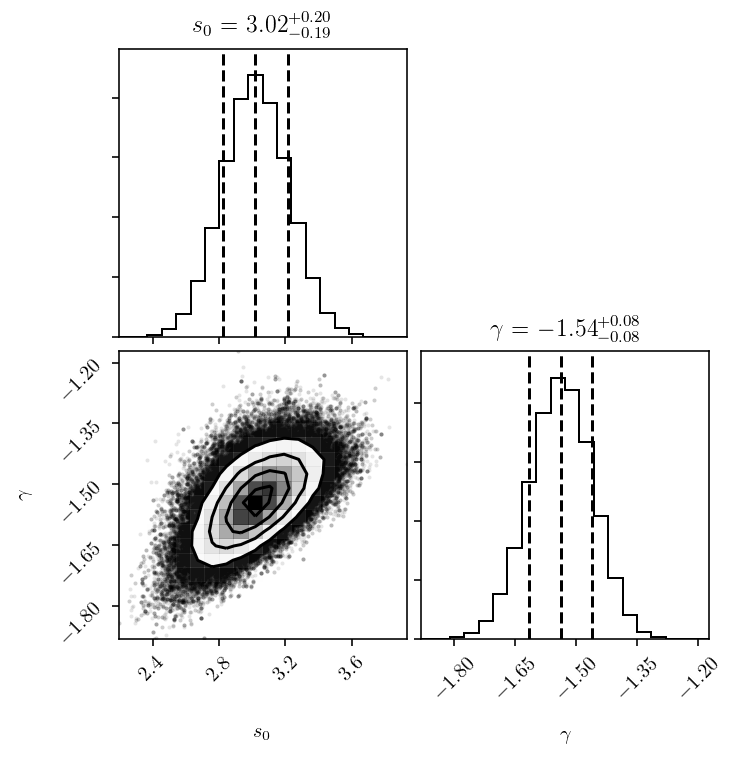

In [152]:
#what to pick from the samples? 
nll = lambda *args: -lnlike(*args)
s0,gamm = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                 zip(*np.percentile(samples, [16, 50, 84],
                                                    axis=0)))

print s0,gamm
best_fit = [s0[0],gamm[0]]
print best_fit

chi_sq = np.dot(xi-power_law(s[:-1],best_fit),np.dot(iCov,xi-power_law(s[:-1],best_fit)))
print chi_sq, s[:-1].size-2

import corner

fig = corner.corner(samples[:,[0,1]], labels=["$s_0$", "$\\gamma$",], show_titles=True, quantiles=[0.16,0.5,0.84])
# fig.suptitle('$\\chi^2={0:.2f}$'.format(chi_sq), x = 0.7, fontsize=22)
fig.savefig('corner_best_fit_s0_gamma.pdf', bbox_inches='tight')

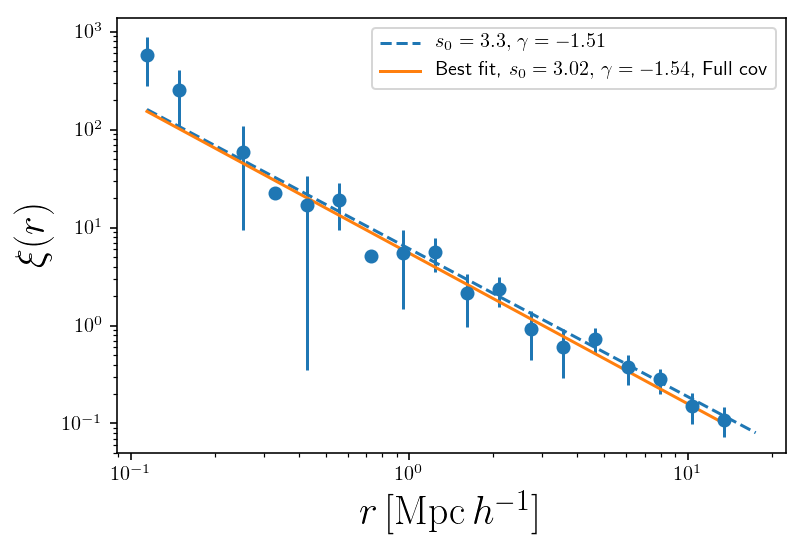

In [154]:
# plt.loglog(s[:-1],xi)
# plt.errorbar(s[:-1],xi,yerr=np.std(xi_boot,axis=0))
plt.errorbar(s[:-1],xi,yerr=np.sqrt(np.diag(Cov)), fmt='C0o')
plt.loglog(s,(s/3.3)**(-1.51),'--', label = '$s_0=3.3,\,\\gamma=-1.51$')
plt.loglog(s[:-1],power_law(s[:-1],best_fit), label = 'Best fit, $s_0=%0.2f,\,\\gamma=%0.2f$, Full cov'%(best_fit[0],best_fit[1]))
plt.xlabel('$r\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.ylabel('$\\xi(r)$',fontsize=20)
plt.legend()
plt.savefig('xi_r_best_fit.pdf', bbox_inches='tight')